In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

In [3]:
df.sample(5).T

,157,89,199,159,178
TV,149.8,109.8,232.1,131.7,276.7
Radio,1.3,47.8,8.6,18.4,2.3
Newspaper,24.3,51.4,8.7,34.6,23.7
Sales,10.1,16.7,18.4,12.9,16.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

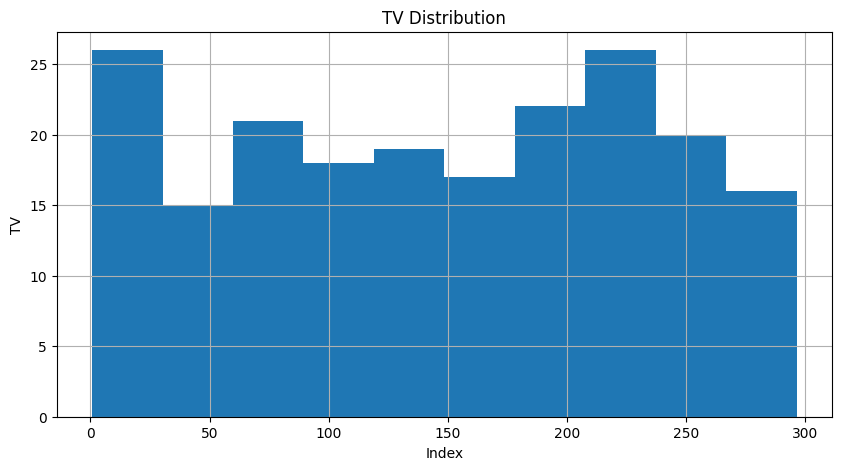

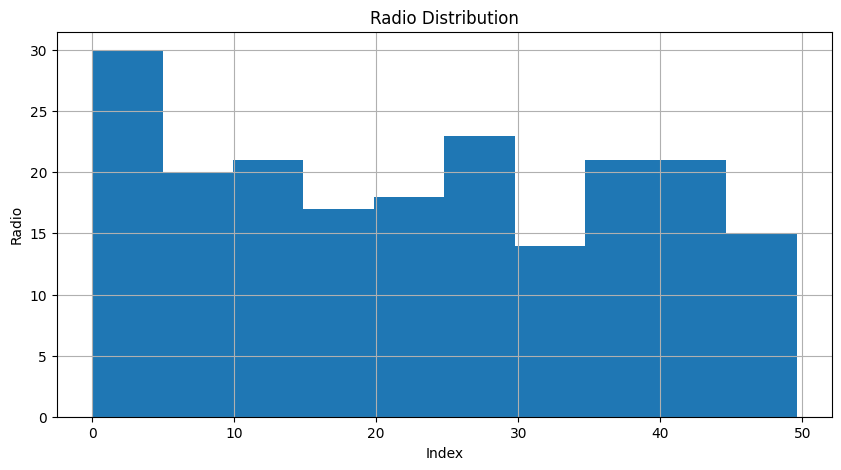

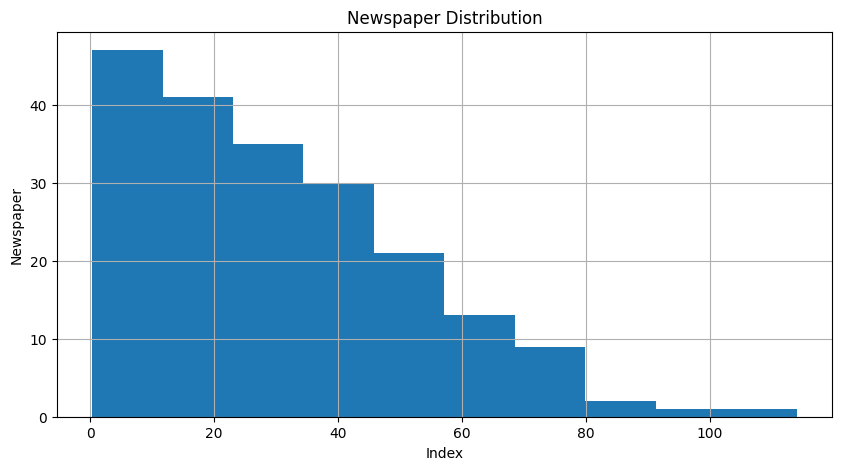

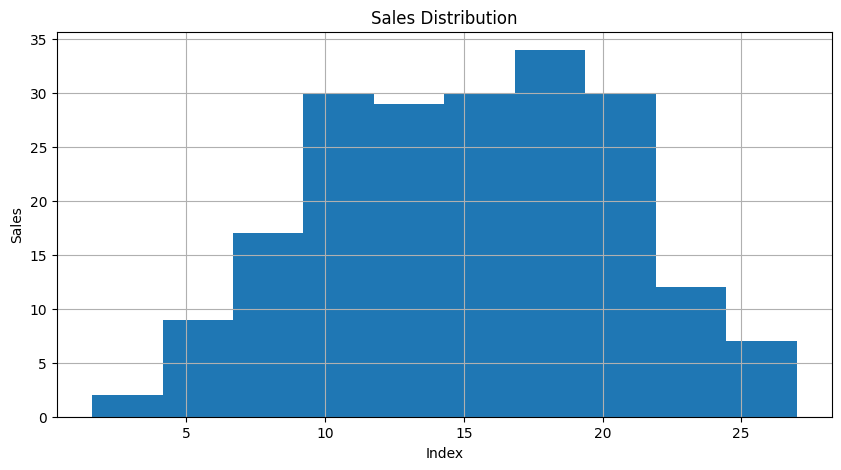

In [7]:
import matplotlib.pyplot as plt 

# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()
    
    
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotting for each column
for col in df.columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

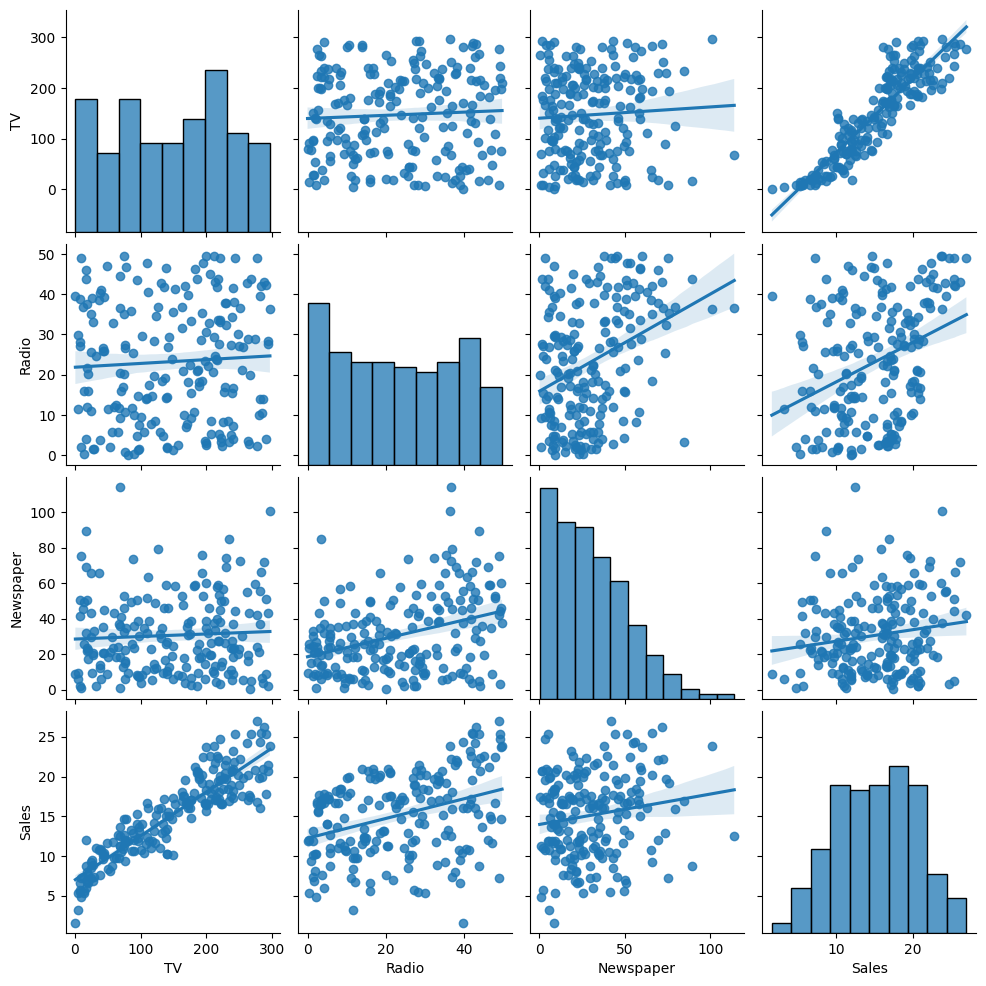

In [8]:
import seaborn as sns
sns.pairplot(df, kind='reg')

In [9]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [10]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Building machine learning model and training them
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [12]:
# Evaluating the performance of model with evaluation metrics

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))
     

The performance evaluation of Logistic Regression is below:  

Mean squared error:  2.9077569102710896
Mean absolute error:  1.2748262109549338
R2 score:  0.9059011844150826


In [13]:
X.head(5)


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y.head(5)


0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [15]:
# Create new trial dataframe to testing

data = {'TV': [100], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)

In [16]:
# Predict rating using trial data
predict_rating = Model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  12.227327202015562
